In [1]:
import matplotlib.pyplot as plt

In [2]:
import torch

In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import openpyxl

In [4]:
df = pd.read_excel('DSSToxQuery_20231117_REACH.xlsx', index_col=[0])
df.head()

/home/grace/Documents/python/misc/cuda/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Found_By,DSSTox_Substance_Id,DSSTox_Structure_Id,DSSTox_QC-Level,Substance_Name,Substance_CASRN,Substance_Type,Substance_Note,Structure_SMILES,Structure_InChI,Structure_InChIKey,Structure_Formula,Structure_MolWt,Structure_SMILES_2D-QSAR,DateModified
Query,,,,,,,,,,,,,,,
50-45-3,CAS-RN matched <b>null</b>,DTXSID5024976,DTXCID704976,DSSTox_High,"2,3-Dichlorobenzoic acid",50-45-3,Single Compound,"Benzoic acid, 2,3-dichloro-\n",OC(=O)C1=CC=CC(Cl)=C1Cl,InChI=1S/C7H4Cl2O2/c8-5-3-1-2-4(6(5)9)7(10)11/...,QAOJBHRZQQDFHA-UHFFFAOYSA-N,C7H4Cl2O2,191.010,OC(=O)C1=CC=CC(Cl)=C1Cl,20210719.0
50-48-6,CAS-RN matched <b>null</b>,DTXSID7022594,DTXCID502594,DSSTox_High,Amitriptyline,50-48-6,Single Compound,NaN,CN(C)CCC=C1C2=CC=CC=C2CCC2=C1C=CC=C2,InChI=1S/C20H23N/c1-21(2)15-7-12-20-18-10-5-3-...,KRMDCWKBEZIMAB-UHFFFAOYSA-N,C20H23N,277.411,CN(C)CCC=C1C2=CC=CC=C2CCC2=C1C=CC=C2,20230406.0
50-85-1,CAS-RN matched <b>null</b>,DTXSID30198166,DTXCID60120657,Public_High_CAS,m-Cresotic acid,50-85-1,Single Compound,Loaded based on no conflicts with this data in...,CC1=CC(O)=C(C=C1)C(O)=O,InChI=1S/C8H8O3/c1-5-2-3-6(8(10)11)7(9)4-5/h2-...,NJESAXZANHETJV-UHFFFAOYSA-N,C8H8O3,152.149,CC1=CC(O)=C(C=C1)C(O)=O,20210723.0
51-03-6,CAS-RN matched <b>null</b>,DTXSID1021166,DTXCID501166,DSSTox_High,Piperonyl butoxide,51-03-6,Single Compound,NaN,CCCCOCCOCCOCC1=CC2=C(OCO2)C=C1CCC,InChI=1S/C19H30O5/c1-3-5-7-20-8-9-21-10-11-22-...,FIPWRIJSWJWJAI-UHFFFAOYSA-N,C19H30O5,338.444,CCCCOCCOCCOCC1=CC2=C(OCO2)C=C1CCC,20231110.0
51-17-2,CAS-RN matched <b>null</b>,DTXSID8024573,DTXCID704573,DSSTox_High,Benzimidazole,51-17-2,Single Compound,NaN,N1C=NC2=C1C=CC=C2,"InChI=1S/C7H6N2/c1-2-4-7-6(3-1)8-5-9-7/h1-5H,(...",HYZJCKYKOHLVJF-UHFFFAOYSA-N,C7H6N2,118.139,N1C=NC2=C1C=CC=C2,20210519.0


In [5]:
df.columns

Index(['Found_By', 'DSSTox_Substance_Id', 'DSSTox_Structure_Id',
       'DSSTox_QC-Level', 'Substance_Name', 'Substance_CASRN',
       'Substance_Type', 'Substance_Note', 'Structure_SMILES',
       'Structure_InChI', 'Structure_InChIKey', 'Structure_Formula',
       'Structure_MolWt', 'Structure_SMILES_2D-QSAR', 'DateModified'],
      dtype='object')

In [6]:
df.rename(columns = {'DSSTox_Substance_Id': 'dtxsid', 'Structure_SMILES': 'smiles'}, inplace = True)

In [7]:
df

,Found_By,dtxsid,DSSTox_Structure_Id,DSSTox_QC-Level,Substance_Name,Substance_CASRN,Substance_Type,Substance_Note,smiles,Structure_InChI,Structure_InChIKey,Structure_Formula,Structure_MolWt,Structure_SMILES_2D-QSAR,DateModified
Query,,,,,,,,,,,,,,,
50-45-3,CAS-RN matched <b>null</b>,DTXSID5024976,DTXCID704976,DSSTox_High,"2,3-Dichlorobenzoic acid",50-45-3,Single Compound,"Benzoic acid, 2,3-dichloro-\n",OC(=O)C1=CC=CC(Cl)=C1Cl,InChI=1S/C7H4Cl2O2/c8-5-3-1-2-4(6(5)9)7(10)11/...,QAOJBHRZQQDFHA-UHFFFAOYSA-N,C7H4Cl2O2,191.010,OC(=O)C1=CC=CC(Cl)=C1Cl,20210719.0
50-48-6,CAS-RN matched <b>null</b>,DTXSID7022594,DTXCID502594,DSSTox_High,Amitriptyline,50-48-6,Single Compound,NaN,CN(C)CCC=C1C2=CC=CC=C2CCC2=C1C=CC=C2,InChI=1S/C20H23N/c1-21(2)15-7-12-20-18-10-5-3-...,KRMDCWKBEZIMAB-UHFFFAOYSA-N,C20H23N,277.411,CN(C)CCC=C1C2=CC=CC=C2CCC2=C1C=CC=C2,20230406.0
50-85-1,CAS-RN matched <b>null</b>,DTXSID30198166,DTXCID60120657,Public_High_CAS,m-Cresotic acid,50-85-1,Single Compound,Loaded based on no conflicts with this data in...,CC1=CC(O)=C(C=C1)C(O)=O,InChI=1S/C8H8O3/c1-5-2-3-6(8(10)11)7(9)4-5/h2-...,NJESAXZANHETJV-UHFFFAOYSA-N,C8H8O3,152.149,CC1=CC(O)=C(C=C1)C(O)=O,20210723.0
51-03-6,CAS-RN matched <b>null</b>,DTXSID1021166,DTXCID501166,DSSTox_High,Piperonyl butoxide,51-03-6,Single Compound,NaN,CCCCOCCOCCOCC1=CC2=C(OCO2)C=C1CCC,InChI=1S/C19H30O5/c1-3-5-7-20-8-9-21-10-11-22-...,FIPWRIJSWJWJAI-UHFFFAOYSA-N,C19H30O5,338.444,CCCCOCCOCCOCC1=CC2=C(OCO2)C=C1CCC,20231110.0
51-17-2,CAS-RN matched <b>null</b>,DTXSID8024573,DTXCID704573,DSSTox_High,Benzimidazole,51-17-2,Single Compound,NaN,N1C=NC2=C1C=CC=C2,"InChI=1S/C7H6N2/c1-2-4-7-6(3-1)8-5-9-7/h1-5H,(...",HYZJCKYKOHLVJF-UHFFFAOYSA-N,C7H6N2,118.139,N1C=NC2=C1C=CC=C2,20210519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253768-88-6,CAS-RN matched <b>null</b>,DTXSID201119074,DTXCID201550634,Public_High_CAS,"Phenyl (3S,4R)-3-[(1,3-benzodioxol-5-yloxy)met...",253768-88-6,Single Compound,NaN,FC1=CC=C(C=C1)[C@@H]1CCN(C[C@H]1COC1=CC=C2OCOC...,InChI=1S/C26H24FNO5/c27-20-8-6-18(7-9-20)23-12...,XHNUMAXRQGMHKZ-CVDCTZTESA-N,C26H24FNO5,449.478,NaN,20210723.0
37143-54-7,CAS-RN matched <b>null</b>,DTXSID4029359,DTXCID609359,DSSTox_High,1-Methoxy-2-propylamine,37143-54-7,Mixture of Stereoisomers,NaN,COCC(C)N,"InChI=1/C4H11NO/c1-4(5)3-6-2/h4H,3,5H2,1-2H3\n...",NXMXETCTWNXSFG-UHFFFAOYNA-N,C4H11NO,89.138,COCC(C)N,20230322.0
25618-55-7,CAS-RN matched <b>null</b>,DTXSID1051226,NaN,DSSTox_High,Polyglycerol,25618-55-7,Polymer,Polymer class: Polyether;\n(C3 H8 O3)x\n\nReco...,NaN,NaN,NaN,NaN,NaN,NaN,20230321.0


In [8]:
def mk_fp(df):
    try:
        a = {k:Chem.MolFromSmiles(v) for k,v in zip(df['dtxsid'], df['smiles'])}
    except Exception as error:
        print(error)
    finally:
        b = {k:v for k,v in a.items() if v is not None}
    return b

In [9]:
def content_max(df):
    content = {}
    content['t_dict'] = mk_fp(df)
    content['fp_dict'] = [AllChem.GetMorganFingerprintAsBitVect(i, 3, 1024) for i in content['t_dict'].values()]
    content['nfp_dict'] = len(content['fp_dict'])
    content['t_index'] = {k:v for k,v in enumerate(content['t_dict'].keys())} 
    
    
    return content

In [10]:
df = df[df['smiles'].notnull()]

In [11]:
df2 = content_max(df)

[15:55:25] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[15:55:25] Explicit valence for atom # 3 Si, 8, is greater than permitted
[15:55:25] WARNING: not removing hydrogen atom without neighbors
[15:55:25] Explicit valence for atom # 31 N, 4, is greater than permitted
[15:55:25] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[15:55:25] WARNING: not removing hydrogen atom without neighbors
[15:55:25] Explicit valence for atom # 9 Al, 8, is greater than permitted
[15:55:25] WARNING: not removing hydrogen atom without neighbors
[15:55:25] WARNING: not removing hydrogen atom without neighbors
[15:55:25] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[15:55:25] Can't kekulize mol.  Unkekulized atoms: 7 8 10 12 13
[15:55:25] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 12
[15:55:25] Explicit valence for atom # 3 O, 3, is greater than permitted
[15:55:26] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11
[15:55:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[15:55:26] 

In [12]:
from rdkit import SimDivFilters,DataStructs

In [13]:
len(df2['t_dict'])

8432

In [14]:
def picker_func(fps, n1, start_with  = 1, n2 = 500,  fps_index = None):
    picker_dict = {}
    mmp = SimDivFilters.MaxMinPicker()
    picker_dict['indices'] = mmp.LazyBitVectorPick(fps,n1, start_with+n2, [0])
    picker_dict['diverse_chems'] = [fps_index[x] for x in picker_dict['indices']]
    return picker_dict

In [15]:
picker_lst = []
picker_lst.append(picker_func(df2['fp_dict'], n1 =df2['nfp_dict'], n2 = 500, fps_index = df2['t_index']  ))

In [16]:
diverse_chems = picker_lst[0]['diverse_chems']

In [17]:
len(diverse_chems)

501

In [18]:
#diverse_chems

In [19]:
import numpy as np

In [20]:
def mkfp(df, name, smi):
    MOLS = dict(zip(df[name], df[smi]))
    MOLS = {k:Chem.MolFromSmiles(v) for k,v in MOLS.items()}
    MOLS = {i:j for i,j in MOLS.items() if j}
    FP = pd.DataFrame([np.array(AllChem.GetMorganFingerprintAsBitVect(i,3,1024)) for i in MOLS.values()])
    FP.index=MOLS.keys()
    FP.columns = ['mrgn_%d'%i for i in FP.columns]
    return FP

In [21]:
echa = mkfp(df[df['smiles'].notnull()], 'dtxsid', 'smiles')

[15:55:43] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[15:55:43] Explicit valence for atom # 3 Si, 8, is greater than permitted
[15:55:43] WARNING: not removing hydrogen atom without neighbors
[15:55:43] Explicit valence for atom # 31 N, 4, is greater than permitted
[15:55:43] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[15:55:43] WARNING: not removing hydrogen atom without neighbors
[15:55:43] Explicit valence for atom # 9 Al, 8, is greater than permitted
[15:55:43] WARNING: not removing hydrogen atom without neighbors
[15:55:43] WARNING: not removing hydrogen atom without neighbors
[15:55:43] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[15:55:43] Can't kekulize mol.  Unkekulized atoms: 7 8 10 12 13
[15:55:44] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 12
[15:55:44] Explicit valence for atom # 3 O, 3, is greater than permitted
[15:55:44] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11
[15:55:44] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[15:55:44] 

In [22]:
smi_dict = {k:v for k,v in zip(df['dtxsid'], df['smiles'])}

In [23]:
#smi_dict

In [24]:
df1 = df[['dtxsid', 'smiles']].reset_index()[['dtxsid', 'smiles']]

In [25]:
df1 = df1.set_index('dtxsid')

In [26]:
#echa

In [27]:
from scipy.spatial.distance import pdist, squareform

D_mgrn = pd.DataFrame(squareform(pdist(echa, 'jaccard')), columns = echa.index, index = echa.index)
S_mgrn = 1-D_mgrn
S_mgrn.head()

,DTXSID5024976,DTXSID7022594,DTXSID30198166,DTXSID1021166,DTXSID8024573,DTXSID0020523,DTXSID4024981,DTXSID2043874,DTXSID4049038,DTXSID6035106,...,DTXSID601350426,DTXSID20889359,DTXSID901023874,DTXSID1064952,DTXSID00889559,DTXSID50991338,DTXSID00889695,DTXSID2021234,DTXSID3070759,DTXSID80889431
DTXSID5024976,1.000000,0.065574,0.232558,0.042254,0.081633,0.100000,0.236842,0.088889,0.063830,0.105263,...,0.073171,0.101266,0.075269,0.108108,0.077778,0.082353,0.021277,0.081081,0.083333,0.089286
DTXSID7022594,0.065574,1.000000,0.064516,0.074074,0.100000,0.062500,0.034483,0.087719,0.032787,0.018519,...,0.017857,0.063830,0.086538,0.079545,0.078431,0.082474,0.016667,0.094118,0.061224,0.062992
DTXSID30198166,0.232558,0.064516,1.000000,0.056338,0.058824,0.191489,0.200000,0.111111,0.085106,0.102564,...,0.071429,0.128205,0.074468,0.106667,0.126437,0.081395,0.042553,0.125000,0.095238,0.128440
DTXSID1021166,0.042254,0.074074,0.056338,1.000000,0.056338,0.054795,0.045455,0.075758,0.043478,0.049180,...,0.015385,0.048077,0.070175,0.061224,0.053097,0.065421,0.029412,0.062500,0.056075,0.058824
DTXSID8024573,0.081633,0.100000,0.058824,0.056338,1.000000,0.076923,0.066667,0.086957,0.085106,0.023810,...,0.022727,0.047619,0.086022,0.077922,0.053763,0.107143,0.020833,0.094595,0.057471,0.051282


In [28]:
def nearest_neighbour(S, target, n = 10):
    t_m =S[target].values
    ids_chem = {i:x for i, x in enumerate(S.index)}
    temp_chem = np.argpartition(-t_m, n)
    chem_nn = temp_chem[:n]
    nn_chem = [ids_chem[x] for x in chem_nn]
    mydict = {k:v for k,v in list(zip(nn_chem,t_m[chem_nn]))}
    df = pd.DataFrame(mydict.items(), columns = ['dtxsid', 'Jaccard']).sort_values(by = 'Jaccard', ascending = False)
    return df

In [29]:
targets_pred = {}
errors = []
for e in diverse_chems:
    try:
        targets_pred[e] = nearest_neighbour(S_mgrn,e,n=3)
    except Exception as error:
        print(error)

In [30]:
dfs_list = list(targets_pred.values())

# Concatenate the list of DataFrames
result_df = pd.concat(dfs_list, keys=targets_pred.keys())

# Reset index for a clean DataFrame
result_df = result_df.reset_index(level=1, drop=True).reset_index()
result_df

,index,dtxsid,Jaccard
0,DTXSID5024976,DTXSID5024976,1.000000
1,DTXSID5024976,DTXSID80228306,0.526316
2,DTXSID5024976,DTXSID4024771,0.500000
3,DTXSID0025440,DTXSID0025440,1.000000
4,DTXSID0025440,DTXSID4027109,0.521739
...,...,...,...
1498,DTXSID201075212,DTXSID30604010,0.183333
1499,DTXSID201075212,DTXSID1052585,0.181818
1500,DTXSID401149566,DTXSID401149566,1.000000
1501,DTXSID401149566,DTXSID001044722,0.454545


In [31]:
result_df = result_df[(result_df['index'] != result_df['dtxsid'])]

In [32]:
result_df[result_df['index'] == 'DTXSID5024976']

,index,dtxsid,Jaccard
1,DTXSID5024976,DTXSID80228306,0.526316
2,DTXSID5024976,DTXSID4024771,0.500000


In [33]:
#result_df2 = result_df[result_df['Jaccard'] >0.6]

In [34]:
result_df.columns = ['target', 'analogue', 'jaccard']


In [35]:
ids_ = list(set(result_df['target'].tolist() + result_df['analogue'].tolist()))

In [36]:
df2 = pd.DataFrame(index = ids_, columns = ids_)

In [38]:
cats = {k:list(v['analogue']) for k,v in result_df.groupby('target')}

In [39]:
cases = list(cats.values())

In [40]:
def update_df(df):
    df1 = df.copy()
    for i in df1.index:
        for c in df1.columns:
            if i == c:
                df1.loc[i,c] =0
            elif any((i in sublist) and (c in sublist) for sublist in cases):
                df1.loc[i, c] =0
            else:
                df1.loc[i, c] = 1
    return df1

In [41]:
updated = update_df(df2)

In [42]:
updated

,DTXSID001177923,DTXSID6060393,DTXSID3020128,DTXSID4020533,DTXSID30889244,DTXSID8074815,DTXSID40438803,DTXSID60889358,DTXSID30286234,DTXSID60469033,...,DTXSID30863660,DTXSID9020376,DTXSID50947830,DTXSID5025023,DTXSID901032334,DTXSID0070233,DTXSID6072502,DTXSID80937582,DTXSID10447528,DTXSID4043721
DTXSID001177923,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DTXSID6060393,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DTXSID3020128,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DTXSID4020533,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DTXSID30889244,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID0070233,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
DTXSID6072502,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
DTXSID80937582,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
DTXSID10447528,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


In [43]:
import numpy as np

In [44]:
def isSymmetric(mat, N):
    transmat = np.array(mat).transpose()
    if np.array_equal(mat, transmat):
        return True
    return False

In [45]:
isSymmetric(updated.values, 1426)

True

In [46]:
def remove_upper_triangle(df):
    # Get the upper triangle mask
    mask = pd.DataFrame(np.triu(np.ones(df.shape), k=0), columns=df.columns, index=df.index)

    # Set upper triangle values to NaN
    df = df.where(mask == 0)

    return df

In [47]:
new_df3 = remove_upper_triangle(updated)

In [48]:
new_df3 =new_df3.unstack().reset_index().dropna()

In [49]:
new_df3

,level_0,level_1,0
1,DTXSID001177923,DTXSID6060393,1
2,DTXSID001177923,DTXSID3020128,1
3,DTXSID001177923,DTXSID4020533,1
4,DTXSID001177923,DTXSID30889244,1
5,DTXSID001177923,DTXSID8074815,1
...,...,...,...
2029196,DTXSID6072502,DTXSID10447528,1
2029197,DTXSID6072502,DTXSID4043721,1
2030622,DTXSID80937582,DTXSID10447528,1
2030623,DTXSID80937582,DTXSID4043721,1


In [50]:
new_df4 = remove_upper_triangle(S_mgrn)

In [51]:
new_df4 = new_df4.unstack().reset_index().dropna()

In [52]:
new_df4.columns = ['Target', 'Analogue', 'Label']

In [53]:
new_df4 = new_df4[new_df4['Target'] != new_df4['Analogue']]

In [54]:
new_df4['label'] = new_df4['Label'].apply(lambda x: 0 if x>= 0.6 else 1)

In [55]:
new_df4['label'].value_counts()

label
1    35541755
0        3341
Name: count, dtype: int64

In [56]:
similar_pairs = new_df4[new_df4['label'] == 0]
dissimilar_pairs = new_df4[new_df4['label'] == 1]

# Step 2: Downsample dissimilar pairs
downsampled_dissimilar_pairs = dissimilar_pairs.sample(n=len(similar_pairs), replace=False)

# Step 3: Combine balanced pairs
balanced_df = pd.concat([similar_pairs, downsampled_dissimilar_pairs])

# Step 4: Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)
balanced_df

,Target,Analogue,Label,label
18995674,DTXSID5051440,DTXSID30334042,0.033898,1
53736811,DTXSID401192284,DTXSID00919380,0.051282,1
22309213,DTXSID8044545,DTXSID301101703,0.707865,0
21532704,DTXSID4065024,DTXSID40659879,0.058824,1
6748581,DTXSID4021971,DTXSID50884655,0.035714,1
...,...,...,...,...
56730387,DTXSID901214524,DTXSID60858781,0.025974,1
33818349,DTXSID00904377,DTXSID90356780,0.074074,1
26382072,DTXSID40184651,DTXSID001291864,0.064516,1
18532067,DTXSID8027589,DTXSID30469101,0.000000,1


In [57]:
balanced_df.columns = ['Target', 'Analogue', 'Jaccard', 'Label']

In [58]:
#smi_dict

In [59]:
balanced_df['analogue_smi'] = balanced_df['Analogue'].apply(lambda x: smi_dict[x])
balanced_df['target_smi'] = balanced_df['Target'].apply(lambda x: smi_dict[x])


In [60]:
from rdkit import DataStructs
from rdkit.Chem import AllChem

In [61]:
balanced_df['analogue_mol'] = [Chem.MolFromSmiles(e) for e in balanced_df['analogue_smi']]

balanced_df['target_mol'] = [Chem.MolFromSmiles(e) for e in balanced_df['target_smi']]


[16:05:46] WARNING: not removing hydrogen atom without neighbors
[16:05:46] WARNING: not removing hydrogen atom without neighbors
[16:05:46] WARNING: not removing hydrogen atom without neighbors
[16:05:46] WARNING: not removing hydrogen atom without neighbors
[16:05:46] WARNING: not removing hydrogen atom without neighbors
[16:05:46] WARNING: not removing hydrogen atom without neighbors
[16:05:46] WARNING: not removing hydrogen atom without neighbors
[16:05:46] WARNING: not removing hydrogen atom without neighbors
[16:05:46] WARNING: not removing hydrogen atom without neighbors
[16:05:46] WARNING: not removing hydrogen atom without neighbors
[16:05:46] WARNING: not removing hydrogen atom without neighbors
[16:05:46] WARNING: not removing hydrogen atom without neighbors
[16:05:46] WARNING: not removing hydrogen atom without neighbors
[16:05:46] WARNING: not removing hydrogen atom without neighbors
[16:05:46] WARNING: not removing hydrogen atom without neighbors
[16:05:46] WARNING: not r

In [62]:
fpgen = AllChem.GetMorganGenerator(radius=3, fpSize=1024)

In [63]:
balanced_df['fps_target'] = balanced_df['target_mol'].apply(lambda x: fpgen.GetFingerprint(x))

In [64]:
balanced_df['fps_analogue'] = balanced_df['analogue_mol'].apply(lambda x: fpgen.GetFingerprint(x))

In [65]:
#new_df3

In [66]:
def euclidean_distance(v1, v2):
    return np.linalg.norm(np.array(v1) - np.array(v2))


In [67]:
mylst2 = []
for i, row in balanced_df.iterrows():
    mylst2.append(euclidean_distance(row['fps_target'], row['fps_analogue']))

In [68]:
len(mylst2)

6682

In [69]:
balanced_df['Euclidean'] = mylst2

In [70]:
#new_df3.to_csv('new_df3.csv')

<Axes: >

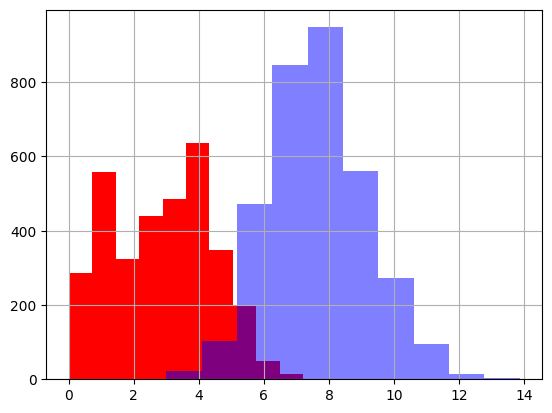

In [71]:
balanced_df[balanced_df['Label'] ==0]['Euclidean'].hist(color = 'r')
balanced_df[balanced_df['Label'] ==1]['Euclidean'].hist(color = 'b', alpha = 0.5)

In [72]:
balanced_df['Label'].value_counts()

Label
1    3341
0    3341
Name: count, dtype: int64

In [223]:
balanced_df.to_csv('balanced_echa.csv')

In [4]:
balanced_df = pd.read_csv('balanced_echa.csv', index_col = [0])
balanced_df

,Target,Analogue,Jaccard,Label,analogue_smi,target_smi,analogue_mol,target_mol,fps_target,fps_analogue,Euclidean
18995674,DTXSID5051440,DTXSID30334042,0.033898,1,CCCCCCO[Si](C)(C)C,Cl.COC1=CC=CC=C1N1CCNCC1,<rdkit.Chem.rdchem.Mol object at 0x7f8f8a80b580>,<rdkit.Chem.rdchem.Mol object at 0x7f8f708c53c0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,7.549834
53736811,DTXSID401192284,DTXSID00919380,0.051282,1,C=CCC(CC=C)=CCC1CC(=O)OC1=O,CC1=CC=C(C=C1)C1CCC(CC1)C1CCC2(CC1)OCCO2,<rdkit.Chem.rdchem.Mol object at 0x7f8f8a80b4a0>,<rdkit.Chem.rdchem.Mol object at 0x7f8f708c54a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,8.602325
22309213,DTXSID8044545,DTXSID301101703,0.707865,0,CN(C)[C@H]1[C@@H]2C[C@@H]3CC4=C(C=O)C=CC(O)=C4...,Cl.CN(C)[C@H]1[C@@H]2C[C@@H]3CC4=C(C(O)=CC=C4N...,<rdkit.Chem.rdchem.Mol object at 0x7f8f8a80b6d0>,<rdkit.Chem.rdchem.Mol object at 0x7f8f708c5430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,5.099020
21532704,DTXSID4065024,DTXSID40659879,0.058824,1,CC1(C)[C@@H]2CCC11CS(=O)(=O)N=C1C2,CC1=CC=C(NC2=CC(C(O)=O)=C(NC3=CC=C(C)C=C3)C=C2...,<rdkit.Chem.rdchem.Mol object at 0x7f8f8a80b430>,<rdkit.Chem.rdchem.Mol object at 0x7f8f708c5510>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,8.000000
6748581,DTXSID4021971,DTXSID50884655,0.035714,1,CC(=C)C(=O)OCCC[Si](C)(C)Cl,[O-][N+](=O)C1=CC=CC(Cl)=C1,<rdkit.Chem.rdchem.Mol object at 0x7f8f8a80b3c0>,<rdkit.Chem.rdchem.Mol object at 0x7f8f708c5580>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,7.348469
...,...,...,...,...,...,...,...,...,...,...,...
56730387,DTXSID901214524,DTXSID60858781,0.025974,1,[K+].[K+].O=C1O[Sb-]23OC1C1O[Sb-]4(OC(C(O2)C(=...,CC1=CC(C)=C2C=C(OC2=C1)C1=NC2=C(O)C=CC(O)=C2S1,<rdkit.Chem.rdchem.Mol object at 0x7f8f708c5190>,<rdkit.Chem.rdchem.Mol object at 0x7f8f70a78b30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,8.660254
33818349,DTXSID00904377,DTXSID90356780,0.074074,1,CC(C)(C)NS(=O)(=O)C1=CC=C(N)C=C1,CC(C1=CC=C(OC#N)C=C1)C1=CC=C(OC#N)C=C1,<rdkit.Chem.rdchem.Mol object at 0x7f8f708c5200>,<rdkit.Chem.rdchem.Mol object at 0x7f8f70a78ba0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,7.071068
26382072,DTXSID40184651,DTXSID001291864,0.064516,1,ClC(=O)C1CCC(CC1)C(Cl)=O,NC(=O)C1=C(O)C=CC(=C1)C(=O)CN(CC1=CC=CC=C1)CC1...,<rdkit.Chem.rdchem.Mol object at 0x7f8f708c5270>,<rdkit.Chem.rdchem.Mol object at 0x7f8f70a78c10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,7.615773
18532067,DTXSID8027589,DTXSID30469101,0.000000,1,NC1=CC=C(C=C1)C1=NC(=O)ON1,CCCCOCC(C)O,<rdkit.Chem.rdchem.Mol object at 0x7f8f708c52e0>,<rdkit.Chem.rdchem.Mol object at 0x7f8f70a78c80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,7.549834


Text(0, 0.5, 'Number of test set chemical pairs')

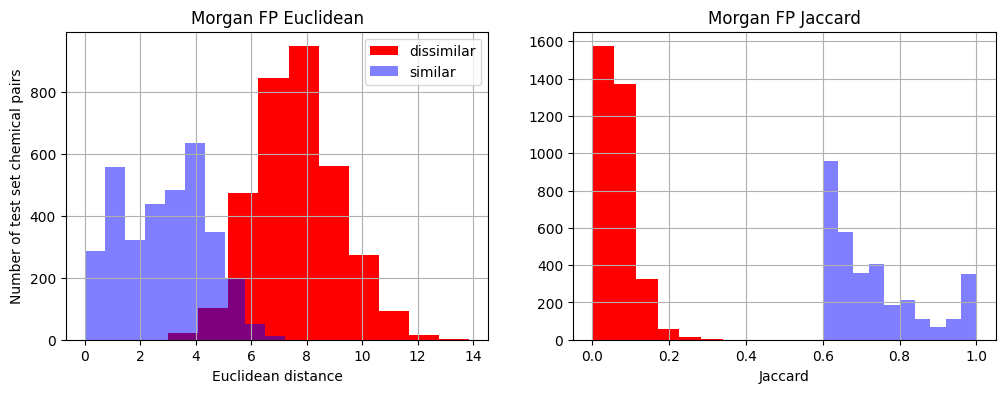

In [6]:
f, axes = plt.subplots(1,2, figsize = (12,4))
balanced_df[balanced_df['Label']==1]['Jaccard'].hist(color = 'r', ax=axes[1], label = 'dissimilar')
balanced_df[balanced_df['Label']==0]['Jaccard'].hist(color = 'b', alpha = 0.5, ax=axes[1], label = 'similar')
balanced_df[balanced_df['Label']==1]['Euclidean'].hist(color = 'r', ax=axes[0], label = 'dissimilar')
balanced_df[balanced_df['Label']==0]['Euclidean'].hist(color = 'b', alpha = 0.5, ax = axes[0], label = 'similar')
axes[1].set_xlabel('Jaccard')
axes[0].set_title('Morgan FP Euclidean')
axes[0].legend()

axes[1].set_title('Morgan FP Jaccard')
axes[0].set_xlabel('Euclidean distance')
axes[0].set_ylabel('Number of test set chemical pairs')
#axes[1].legend()

In [7]:
from sklearn.model_selection import train_test_split
#from kennard_stone import train_test_split

from torch.utils.data import Dataset, DataLoader

In [8]:
X_train, X_test, y_train, y_test  = train_test_split(balanced_df[['Target', 	'Analogue','target_smi', 'analogue_smi', 'Label', 'Euclidean']], balanced_df['Label'], stratify = balanced_df['Label'], random_state = 42,test_size=0.2)

In [9]:
y_train.value_counts(normalize = False)

Label
1    2673
0    2672
Name: count, dtype: int64

In [10]:
y_test.value_counts(normalize = True)

Label
0    0.500374
1    0.499626
Name: proportion, dtype: float64

In [11]:
train_df = pd.concat([X_train,y_train], axis = 1)

In [12]:
duplicated_columns = train_df.columns[train_df.columns.duplicated()]
train_df = train_df.loc[:, ~train_df.columns.duplicated()]
train_df

,Target,Analogue,target_smi,analogue_smi,Label,Euclidean
7472637,DTXSID4044539,DTXSID8062658,ClC1=CC(Cl)=C(C=C1)C(=O)OOC(=O)C1=C(Cl)C=C(Cl)...,OC(=O)CCCCCCCCCCBr,1,6.855655
5877811,DTXSID4021393,DTXSID9026922,OCCOCCOCCO,OCCOCCOCCOCCO,0,1.000000
11741911,DTXSID3022116,DTXSID80203951,CC(C)=CC=C(C)C,CCCCCCCCCCCCCC[C@@H](O)[C@@H](O)[C@@H](N)CO,1,6.244998
21306389,DTXSID8049200,DTXSID40893872,[Ba++].[O-][N+]([O-])=O.[O-][N+]([O-])=O,[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-...,0,2.000000
12203295,DTXSID50236276,DTXSID90275765,OCC1=CC=C(Br)C=C1,[Cl-].NC(=O)C1=C[N+](CC2=CC=CC=C2)=CC=C1,1,7.000000
...,...,...,...,...,...,...
63753920,DTXSID50893888,DTXSID80894146,[Cr+3].OP(O)([O-])=O.OP(O)([O-])=O.OP(O)([O-])=O,[Cr+3].[Cr+3].OP([O-])([O-])=O.OP([O-])([O-])=...,0,1.414214
40513561,DTXSID60352911,DTXSID00228262,FC1=C(C=CC(Br)=C1)C#N,FC(F)(F)C1=CC=CC=C1S(Cl)(=O)=O,1,6.855655
998595,DTXSID0052548,DTXSID90886996,NNS(=O)(=O)C1=CC=CC=C1,[H][C@@]12CC[C@@H](C)[C@]11C[C@]([H])(C2(C)C)[...,1,7.810250
4795738,DTXSID9020295,DTXSID201106300,NC1=CC=C(Cl)C=C1,CC1=CC=C(NC(=O)C2(CC2)C2=CC=C3OC(F)(F)OC3=C2)N...,1,9.899495


In [15]:
duplicated_columns = test_df.columns[test_df.columns.duplicated()]
test_df = test_df.loc[:, ~test_df.columns.duplicated()]
test_df

,Target,Analogue,target_smi,analogue_smi,Label,Euclidean
33589218,DTXSID5044786,DTXSID30869627,CCC(CC1=CC=CC=C1)(N(C)C)C(=O)C1=CC=C(C=C1)N1CC...,CCC(CC1=CC=C(C)C=C1)(N(C)C)C(=O)C1=CC=C(C=C1)N...,0,4.123106
5399752,DTXSID3029607,DTXSID70865966,CC(=C)C(=O)OCCOCCOCCOC(=O)C(C)=C,CCOCCOCCOCCOC(=O)C(C)=C,0,2.449490
13363853,DTXSID10152968,DTXSID3045271,OCCN1C(=O)NC2=CC=CC=C2C1=O,CCCCOC1=CC(C(=O)NCCN(CC)CC)=C2C=CC=CC2=N1,1,9.055385
16833718,DTXSID3027536,DTXSID4069002,CCCCCCCCCCCCCCCCCCCl,CCOC1=C(C(Cl)=O)C2=CC=CC=C2C=C1,1,7.071068
16276983,DTXSID8062812,DTXSID9067980,CCC1(CO)COC1,ClS(=O)(=O)C1=CC(=[N]#N)C(=O)C2=C1C=CC=C2,1,7.141428
...,...,...,...,...,...,...
28076273,DTXSID6057744,DTXSID401020932,COC1=CC=C(C=C1)[C@@H]1SC2=CC=CC=C2NC(=O)[C@@H]1O,OS(O)(=O)=O.CCCCCCN1N=CC(N)=C1N.CCCCCCN1N=CC(N...,1,9.055385
3940805,DTXSID5025312,DTXSID40884907,CCN1CCOCC1,CCCCCCC(CCCC)C(O)=O,1,6.403124
47570619,DTXSID601005150,DTXSID50620974,CCCCCC1CCC(CC1)C1CCC(=O)CC1,[H][C@@]1(CC[C@H](CCC)CC1)[C@@]1([H])CC[C@H](C...,0,4.000000
13451620,DTXSID9029645,DTXSID6050463,[NH4+].F.[F-],[NH4+].[F-],0,1.000000


In [14]:
test_df = pd.concat([X_test,y_test], axis = 1)

<Axes: >

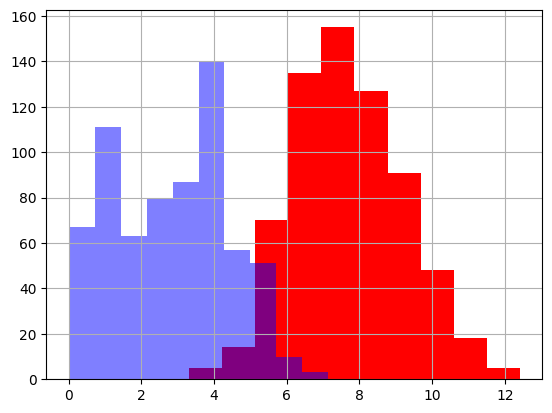

In [16]:
test_df[test_df['Label']==1]['Euclidean'].hist(color = 'r')
test_df[test_df['Label']==0]['Euclidean'].hist(color = 'b', alpha = 0.5)

In [17]:
from torch_geometric.utils import smiles as pygsmi
import torch
import torch_geometric
import torch.nn.functional as F
from torch.nn import Linear
from torch.nn import BatchNorm1d
from torch.utils.data import Dataset
from torch_geometric.nn import GCNConv
from torch_geometric.nn import ChebConv
from torch_geometric.nn import global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader

In [18]:


target_X = [pygsmi.from_smiles(m) for m in X_train['target_smi']]

In [19]:
analogue_X = [pygsmi.from_smiles(m) for m in X_train['analogue_smi']]

In [20]:
class GraphData(Dataset):
    def __init__(self, df):
        """
        GraphData class inheriting from the Dataset class in PyTorch.

        Parameters
        ----------
    
        node_vec_len : int
            Node vector length of molecular graphs
        max_atoms : int
            Maximum number of atoms in molecular graphs
        """
        self.df = df

        # Create lists
        #self.indices = df.index.to_list()
        #self.smiles = df["smiles"].to_list()
        #self.outputs = df["measured log solubility in mols per litre"].to_list()

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        
        """
        Returns node matrix, adjacency matrix, output, and SMILES string of
        molecule.

        Parameters
        ----------
        i : int
            Dataset index

        Returns
        -------
        node_mat : torch.Tensor with dimension (max_atoms,node_vec_len)
            Node matrix
        adj_mat: torch.Tensor with dimension (max_atoms,max_atoms)
            Adjacency matrix
        output : torch.Tensor with dimension n_outputs
            Output vector
        smile : str
            SMILES string of molecule
        """
        
        row = self.df.iloc[idx]
        target = pygsmi.from_smiles(row['target_smi'])
        analogue =pygsmi.from_smiles(row['analogue_smi'])
        target.x = target.x.float()
        analogue.x = analogue.x.float()


        # Get output
        label = torch.tensor(row['Label'], dtype=torch.long)

        return target, analogue, label

   

In [21]:
train_data = GraphData(X_train)

In [22]:
train_data[0][0].num_features

9

In [23]:
test_data = GraphData(X_test)

In [24]:
train_data[0][0].num_features

9

In [56]:
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GINConv,GATv2Conv
from torch_geometric.nn import global_mean_pool, global_add_pool

In [82]:
class GCN(torch.nn.Module):

    def __init__(self):

        super(GCN,self).__init__()
        torch.manual_seed(42)

        # define convolutional layers
        self.conv1 = GATv2Conv(9,512)
        self.conv2 = GATv2Conv(512,256)
        # self.conv3 = GATv2Conv(256,128)
        # self.conv1 = SAGEConv(1024,512)
        # self.conv2 = SAGEConv(512,256)
        # self.conv3 = SAGEConv(256,128)

        # define linear layers
        self.lin1 = Linear(256,128)
        self.lin2 = Linear(128,1)
        # self.lin3 = Linear(64,2)

    # define forward pass
    def forward_once(self,x,edge_index,batch):

        x = self.conv1(x,edge_index)
        x = x.relu()
        x = self.conv2(x,edge_index)
        x = x.relu()
        x = global_mean_pool(x,batch)
        
        x = self.lin1(x)
        x = x.relu()
        x = self.lin2(x)
        
        return x
       
        
    def forward(self, input1, input2):
       
        output1 = self.forward_once(input1.x, input1.edge_index, input1.batch)
        output2 = self.forward_once(input2.x, input2.edge_index, input2.batch)


        return output1, output2
    

In [26]:
class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(9, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
      #  self.conv2 = GINConv(
        #    Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
       #                Linear(dim_h, dim_h), ReLU()))
        #self.conv3 = GINConv(
      #      Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
      #                 Linear(dim_h, dim_h), ReLU()))
        self.lin1 = Linear(dim_h, dim_h*2)
        self.lin2 = Linear(dim_h*2, 1)

    def forward_once(self, x, edge_index, batch):
        #x, edge_index = data.x, data.edge_index
        # Node embeddings 
        h1 = self.conv1(x, edge_index)
        #h2 = self.conv2(h1, edge_index)
        #h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        #h1 = global_add_pool(h1, batch)
        #h2 = global_add_pool(h2, batch)
        #h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        #h = torch.cat((h1, h2, h3), dim=1)
        
        h = global_add_pool(h1, batch)
        # Classifier
        h = self.lin1(h)
        h = h.relu()
        #h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)
        
        return h
       
        
    def forward(self, input1, input2):
       
        output1 = self.forward_once(input1.x, input1.edge_index, input1.batch)
        output2 = self.forward_once(input2.x, input2.edge_index, input2.batch)


        return output1, output2
    
    

In [27]:
gin = GIN(dim_h=32)


In [83]:
gca = GCN()

In [84]:
from torch_geometric.nn.models import GAT, GIN
from torch_geometric.nn import global_mean_pool, global_add_pool, global_max_pool


In [85]:
class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        # Euclidean distance between the embeddings
        euclidean_distance = F.pairwise_distance(output1, output2, keepdim = True)

        # Contrastive loss formula
        contrastive_loss = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))

        return contrastive_loss

In [86]:
criterion = ContrastiveLoss()
#optimizer = torch.optim.SGD(params=gin.parameters(), lr=0.005)

optimizer = torch.optim.Adam(gca.parameters(), lr=0.005)

In [87]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, drop_last=True)

In [88]:
test_loader = DataLoader(test_data, batch_size=64, shuffle=False, drop_last=True)

In [89]:
def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()
     

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [91]:
def train_siamese_network(model, train_loader, optimizer, criterion, num_epochs=10):
    model.train()
    iteration_number= 0
    counter = []
    loss_history = [] 
    for epoch in range(num_epochs):
        total_loss = 0.0
        for i, data in enumerate(train_loader,0):
            input1, input2, label = data
            optimizer.zero_grad()
            output1, output2 = model(input1, input2)
            loss = criterion(output1, output2, label)
            #print(loss)
            total_loss += loss /len(train_loader)
            loss.backward()
            optimizer.step()
            iteration_number += 1
            counter.append(iteration_number)
            loss_history.append(loss.item())
        
        print(f"Epoch [{epoch + 1}/{num_epochs}] Loss: {total_loss / len(train_loader)}")
    show_plot(counter, loss_history)

In [92]:
import numpy as np

In [93]:
def test_network(model, test_loader, threshold=5):
    model.eval()
    true_labels = []
    predicted_labels = []
    euclidean = []
    pair_indices = [] 
    with torch.no_grad():
         for i, data in enumerate(test_loader):
            # Unpack data
            input1, input2, label = data
            #print(input1)
        
            output1, output2 = model(input1, input2)
            #print(label)
            euclidean_distance = F.pairwise_distance(output1, output2)
            predictions = (euclidean_distance < threshold).float()
            
    
            true_labels_batch = label.view(-1).cpu().numpy()
            predicted_scores_batch = predictions.view(-1).cpu().numpy()     
            assert len(true_labels_batch) == len(predicted_scores_batch), "Length mismatch between true labels and predicted scores in a batch."
            indices_batch = zip(input1.smiles, input2.smiles)
            true_labels.extend(true_labels_batch)
            predicted_labels.extend(predicted_scores_batch)
            euclidean.extend(euclidean_distance)
            pair_indices.extend(indices_batch)
    
    # Convert lists to numpy arrays
    
    #true_labels = np.array(true_labels)
    #predicted_labels = np.array(predicted_labels)
            
    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)
    euclidean = np.array(euclidean)
   
    
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return true_labels, predicted_labels, euclidean,pair_indices

Epoch [1/10] Loss: 0.01860395073890686
Epoch [2/10] Loss: 0.018156763166189194
Epoch [3/10] Loss: 0.018041472882032394
Epoch [4/10] Loss: 0.017903374508023262
Epoch [5/10] Loss: 0.017875857651233673
Epoch [6/10] Loss: 0.01790798455476761
Epoch [7/10] Loss: 0.018226349726319313
Epoch [8/10] Loss: 0.018059514462947845
Epoch [9/10] Loss: 0.01808350905776024
Epoch [10/10] Loss: 0.01797637529671192


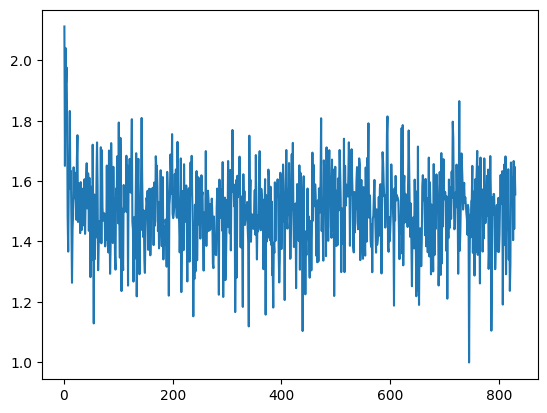

In [94]:
train_siamese_network(gca, train_loader, optimizer, criterion, num_epochs=10)

In [95]:
a,b,c,d = test_network(gca, test_loader, threshold = 2.5)

Accuracy: 0.4969
Precision: 0.4969
Recall: 1.0000
F1 Score: 0.6639


In [96]:
#d

In [97]:
out = pd.DataFrame(list(zip(d,c)), columns = ['target_out', 'euclidean'])

In [98]:
out = pd.concat([pd.DataFrame(out['target_out'].tolist(), index=out.index), out], axis = 1)

In [99]:
out.columns = ['target_smi', 'analogue_smi', 'target_out', 'euclidean']

In [100]:
test_df.shape

(1337, 8)

In [101]:
test_df = pd.merge(test_df, out, on = ['target_smi', 'analogue_smi'], how = 'left')

In [102]:
test_df.shape

(1337, 10)

In [104]:
test_df

,Target,Analogue,target_smi,analogue_smi,Label,Euclidean,target_out_x,euclidean_x,target_out_y,euclidean_y
0,DTXSID5044786,DTXSID30869627,CCC(CC1=CC=CC=C1)(N(C)C)C(=O)C1=CC=C(C=C1)N1CC...,CCC(CC1=CC=C(C)C=C1)(N(C)C)C(=O)C1=CC=C(C=C1)N...,0,4.123106,(CCC(CC1=CC=CC=C1)(N(C)C)C(=O)C1=CC=C(C=C1)N1C...,0.143726,(CCC(CC1=CC=CC=C1)(N(C)C)C(=O)C1=CC=C(C=C1)N1C...,0.001340
1,DTXSID3029607,DTXSID70865966,CC(=C)C(=O)OCCOCCOCCOC(=O)C(C)=C,CCOCCOCCOCCOC(=O)C(C)=C,0,2.449490,"(CC(=C)C(=O)OCCOCCOCCOC(=O)C(C)=C, CCOCCOCCOCC...",0.184333,"(CC(=C)C(=O)OCCOCCOCCOC(=O)C(C)=C, CCOCCOCCOCC...",0.191738
2,DTXSID10152968,DTXSID3045271,OCCN1C(=O)NC2=CC=CC=C2C1=O,CCCCOC1=CC(C(=O)NCCN(CC)CC)=C2C=CC=CC2=N1,1,9.055385,"(OCCN1C(=O)NC2=CC=CC=C2C1=O, CCCCOC1=CC(C(=O)N...",0.058436,"(OCCN1C(=O)NC2=CC=CC=C2C1=O, CCCCOC1=CC(C(=O)N...",0.511163
3,DTXSID3027536,DTXSID4069002,CCCCCCCCCCCCCCCCCCCl,CCOC1=C(C(Cl)=O)C2=CC=CC=C2C=C1,1,7.071068,"(CCCCCCCCCCCCCCCCCCCl, CCOC1=C(C(Cl)=O)C2=CC=C...",0.643733,"(CCCCCCCCCCCCCCCCCCCl, CCOC1=C(C(Cl)=O)C2=CC=C...",1.241410
4,DTXSID8062812,DTXSID9067980,CCC1(CO)COC1,ClS(=O)(=O)C1=CC(=[N]#N)C(=O)C2=C1C=CC=C2,1,7.141428,"(CCC1(CO)COC1, ClS(=O)(=O)C1=CC(=[N]#N)C(=O)C2...",1.171793,"(CCC1(CO)COC1, ClS(=O)(=O)C1=CC(=[N]#N)C(=O)C2...",0.470110
...,...,...,...,...,...,...,...,...,...,...
1332,DTXSID6057744,DTXSID401020932,COC1=CC=C(C=C1)[C@@H]1SC2=CC=CC=C2NC(=O)[C@@H]1O,OS(O)(=O)=O.CCCCCCN1N=CC(N)=C1N.CCCCCCN1N=CC(N...,1,9.055385,NaN,NaN,NaN,NaN
1333,DTXSID5025312,DTXSID40884907,CCN1CCOCC1,CCCCCCC(CCCC)C(O)=O,1,6.403124,NaN,NaN,NaN,NaN
1334,DTXSID601005150,DTXSID50620974,CCCCCC1CCC(CC1)C1CCC(=O)CC1,[H][C@@]1(CC[C@H](CCC)CC1)[C@@]1([H])CC[C@H](C...,0,4.000000,NaN,NaN,NaN,NaN
1335,DTXSID9029645,DTXSID6050463,[NH4+].F.[F-],[NH4+].[F-],0,1.000000,NaN,NaN,NaN,NaN


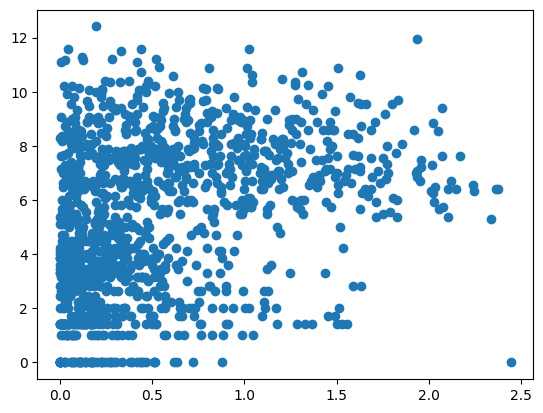

In [105]:
plt.plot(test_df['euclidean_y'], test_df['Euclidean'], marker = 'o', linestyle = 'None')

In [106]:
train_results = test_network(gca, train_loader, threshold = 2.5)

Accuracy: 0.4981
Precision: 0.4992
Recall: 0.9955
F1 Score: 0.6650


In [107]:
from sklearn.metrics import balanced_accuracy_score,accuracy_score,f1_score, confusion_matrix, classification_report


In [108]:
confusion_matrix(a, b)

array([[  0, 644],
       [  0, 636]])

Text(0, 0.5, 'Number of test set chemical pairs')

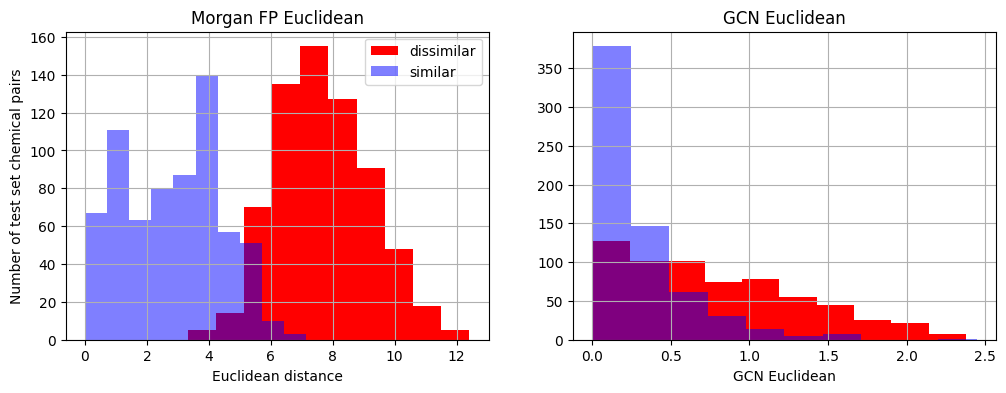

In [109]:
f, axes = plt.subplots(1,2, figsize = (12,4))
test_df[test_df['Label']==1]['euclidean_y'].hist(color = 'r', ax=axes[1], label = 'dissimilar')
test_df[test_df['Label']==0]['euclidean_y'].hist(color = 'b', alpha = 0.5, ax=axes[1], label = 'similar')
test_df[test_df['Label']==1]['Euclidean'].hist(color = 'r', ax=axes[0], label = 'dissimilar')
test_df[test_df['Label']==0]['Euclidean'].hist(color = 'b', alpha = 0.5, ax = axes[0], label = 'similar')
axes[1].set_xlabel('GCN Euclidean')
axes[0].set_title('Morgan FP Euclidean')
axes[0].legend()

axes[1].set_title('GCN Euclidean')
axes[0].set_xlabel('Euclidean distance')
axes[0].set_ylabel('Number of test set chemical pairs')
#axes[1].legend()
#f.savefig('testset_SS.png', dpi = 300, bbox_inches = 'tight')